# Day 6 End of Day Activity

[session link](https://eds-217-essential-python.github.io/course-materials/eod-practice/eod-day6.html)

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://github.com/Spijkervet/eurovision-dataset/releases/download/2020.0/contestants.csv"
eurovision_df = pd.read_csv(url)

## 1. Data Exploration and Cleaning

In [47]:
# Display the first few rows of the dataset.
print(eurovision_df.shape)
eurovision_df.head()

(1603, 21)


,year,to_country_id,to_country,performer,song,place_contest,sf_num,running_final,running_sf,place_final,...,place_sf,points_sf,points_tele_final,points_jury_final,points_tele_sf,points_jury_sf,composers,lyricists,lyrics,youtube_url
0,1956,ch,Switzerland,Lys Assia,Refrain,2.0,NaN,2.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Georg Benz Stahl,NaN,"(Refrain d'amour...)\n\nRefrain, couleur du ci...",https://youtube.com/watch?v=IyqIPvOkiRk
1,1956,nl,Netherlands,Jetty Paerl,De Vogels Van Holland,2.0,NaN,1.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Cor Lemaire,Annie M. G. Schmidt,De vogels van Holland zijn zo muzikaal\nZe ler...,https://youtube.com/watch?v=u45UQVGRVPA
2,1956,be,Belgium,Fud Leclerc,Messieurs Les Noyés De La Seine,2.0,NaN,3.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Jacques Say;Jean Miret,Robert Montal,Messieurs les noyés de la Seine\nOuvrez-moi le...,https://youtube.com/watch?v=U9O3sqlyra0
3,1956,de,Germany,Walter Andreas Schwarz,Im Wartesaal Zum Großen Glück,2.0,NaN,4.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,Walter Andreas Schwarz,NaN,"Es gibt einen Hafen, da fährt kaum ein Schiff\...",https://youtube.com/watch?v=BDNARIDnmTc
4,1956,fr,France,Mathé Altéry,Le Temps Perdu,2.0,NaN,5.0,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,André Lodge,Rachèle Thoreau,"Chante, carillon\nLe chant du temps perdu\nCha...",https://youtube.com/watch?v=dm1L0XyikKI


In [48]:
# Check the data types of each column.
print(eurovision_df.isnull().sum())

eurovision_df.dtypes


year                    0
to_country_id           0
to_country              0
performer               0
song                    3
place_contest          41
sf_num               1046
running_final         282
running_sf           1081
place_final           283
points_final          295
place_sf             1081
points_sf            1081
points_tele_final    1499
points_jury_final    1499
points_tele_sf       1459
points_jury_sf       1459
composers              42
lyricists             673
lyrics                  0
youtube_url             0
dtype: int64


year                   int64
to_country_id         object
to_country            object
performer             object
song                  object
place_contest        float64
sf_num               float64
running_final        float64
running_sf           float64
place_final          float64
points_final         float64
place_sf             float64
points_sf            float64
points_tele_final    float64
points_jury_final    float64
points_tele_sf       float64
points_jury_sf       float64
composers             object
lyricists             object
lyrics                object
youtube_url           object
dtype: object

In [93]:
# Identify and handle any missing values.
# eurovision_df['points_final'] = eurovision_df['points_final'].fillna(eurovision_df['points_final'].mean())
eurovision_df = eurovision_df.fillna(0)

print(eurovision_df.isnull().sum())
eurovision_df.dtypes

year                 0
to_country_id        0
to_country           0
performer            0
song                 0
place_contest        0
sf_num               0
running_final        0
running_sf           0
place_final          0
points_final         0
place_sf             0
points_sf            0
points_tele_final    0
points_jury_final    0
points_tele_sf       0
points_jury_sf       0
composers            0
lyricists            0
lyrics               0
youtube_url          0
dtype: int64


year                   int64
to_country_id         object
to_country            object
performer             object
song                  object
place_contest        float64
sf_num               float64
running_final        float64
running_sf           float64
place_final          float64
points_final         float64
place_sf             float64
points_sf            float64
points_tele_final    float64
points_jury_final    float64
points_tele_sf       float64
points_jury_sf       float64
composers             object
lyricists             object
lyrics                object
youtube_url           object
dtype: object

In [94]:
# Convert the ‘year’ column to datetime type.
eurovision_df['year'] = pd.to_datetime(eurovision_df['year'], format="%Y")

In [58]:
eurovision_df.head()

,year,to_country_id,to_country,performer,song,place_contest,sf_num,running_final,running_sf,place_final,...,place_sf,points_sf,points_tele_final,points_jury_final,points_tele_sf,points_jury_sf,composers,lyricists,lyrics,youtube_url
0,1956-01-01,ch,Switzerland,Lys Assia,Refrain,2.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Georg Benz Stahl,0,"(Refrain d'amour...)\n\nRefrain, couleur du ci...",https://youtube.com/watch?v=IyqIPvOkiRk
1,1956-01-01,nl,Netherlands,Jetty Paerl,De Vogels Van Holland,2.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cor Lemaire,Annie M. G. Schmidt,De vogels van Holland zijn zo muzikaal\nZe ler...,https://youtube.com/watch?v=u45UQVGRVPA
2,1956-01-01,be,Belgium,Fud Leclerc,Messieurs Les Noyés De La Seine,2.0,0.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Jacques Say;Jean Miret,Robert Montal,Messieurs les noyés de la Seine\nOuvrez-moi le...,https://youtube.com/watch?v=U9O3sqlyra0
3,1956-01-01,de,Germany,Walter Andreas Schwarz,Im Wartesaal Zum Großen Glück,2.0,0.0,4.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Walter Andreas Schwarz,0,"Es gibt einen Hafen, da fährt kaum ein Schiff\...",https://youtube.com/watch?v=BDNARIDnmTc
4,1956-01-01,fr,France,Mathé Altéry,Le Temps Perdu,2.0,0.0,5.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,André Lodge,Rachèle Thoreau,"Chante, carillon\nLe chant du temps perdu\nCha...",https://youtube.com/watch?v=dm1L0XyikKI


## Task 2: Filtering and Transformation


In [59]:
# Create a new dataframe containing only data from 1990 onwards
# Important
# Use .copy() to make sure you create a new dataframe and not just a view.
recent_euro = eurovision_df[eurovision_df['year'] > '1990-01-01'].copy()
recent_euro.head()

,year,to_country_id,to_country,performer,song,place_contest,sf_num,running_final,running_sf,place_final,...,place_sf,points_sf,points_tele_final,points_jury_final,points_tele_sf,points_jury_sf,composers,lyricists,lyrics,youtube_url
604,1991-01-01,se,Sweden,Carola,Fångad Av En Stormvind,1.0,0.0,8.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Stephan Berg,0,Jag har aldrig slutat tro\nAtt efter varje nat...,https://youtube.com/watch?v=7wnS4nu-bOc
605,1991-01-01,fr,France,Amina,C'est Le Dernier Qui A Parlé Qui A Raison,2.0,0.0,9.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Wasis Diop,Amina Annabi,C'est le dernier qui a parlé qui a raison\nDan...,https://youtube.com/watch?v=PnxEBAoCZIw
606,1991-01-01,il,Israel,Duo Datz,Kan,3.0,0.0,15.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Uzi Hitman,0,"Kan beiti, po ani noladeti\nBamishor asher al ...",https://youtube.com/watch?v=yF4BDqbidrc
607,1991-01-01,es,Spain,Sergio Dalma,Bailar Pegados,4.0,0.0,19.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Julio Seijas,Luis Gómez-Escolar,Bailar de lejos no es bailar\nEs como estar ba...,https://youtube.com/watch?v=4EGAIciJ76U
608,1991-01-01,ch,Switzerland,Sandra Simò,Canzone Per Te,5.0,0.0,5.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Renato Mascetti,0,Io questa sera vorrei sognare un po'\nCon quat...,https://youtube.com/watch?v=IOkdJSli5Gc


<Axes: ylabel='Frequency'>

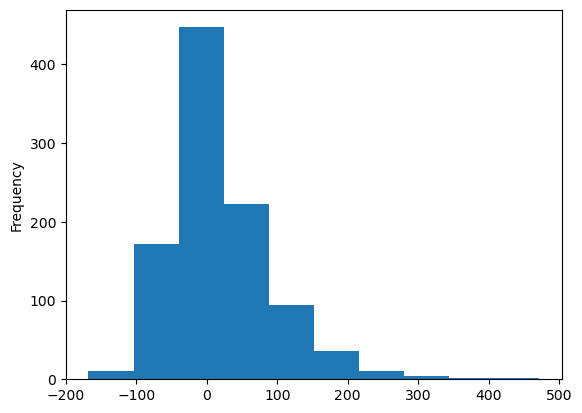

In [62]:
# Calculate the difference between final points and semi-final points for each entry and make a histogram of these values using the builtin dataframe .hist() command.

final_sf = recent_euro['points_final'] - recent_euro['points_sf']
final_sf.plot(kind='hist')

## Task 3: Sorting and Aggregation

Note
Use value_counts() for counting appearances and groupby() for calculating averages.


In [71]:
# Find the top 10 countries with the most Eurovision appearances (use the entire dataset for this calculation)

eurovision_df.value_counts('to_country').sort_values(ascending=False)

to_country
Germany                 65
France                  64
Belgium                 63
United Kingdom          63
Netherlands             62
Switzerland             61
Spain                   60
Sweden                  60
Norway                  59
Ireland                 54
Finland                 54
Austria                 53
Portugal                52
Denmark                 49
Italy                   47
Israel                  43
Greece                  41
Luxembourg              37
Cyprus                  37
Turkey                  34
Iceland                 33
Malta                   33
Yugoslavia              27
Croatia                 26
Estonia                 26
Slovenia                26
Monaco                  24
Poland                  23
Russia                  23
Lithuania               21
Latvia                  21
Romania                 21
North Macedonia         20
Bosnia & Herzegovina    19
Albania                 17
Belarus                 17
Hungary          

In [74]:
# Calculate the average final points for each country across all years. Make a simple bar plot of these data.
avg_final = eurovision_df.groupby('to_country')['points_final'].mean().sort_values(ascending=False)

<Axes: xlabel='to_country'>

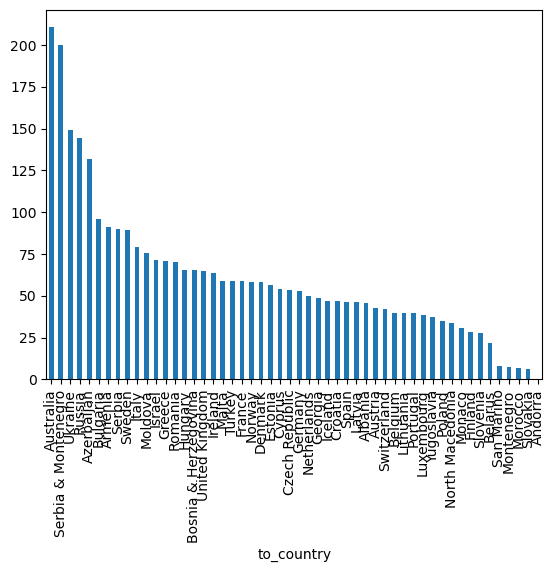

In [75]:
avg_final.plot(kind='bar')

## Task 4: Grouping and Analysis


In [95]:
# Determine the country with the highest average final points for each decade.
eurovision_df['decade'] = eurovision_df['year'].dt.year // 10 * 10

In [97]:
decade_winners = eurovision_df.groupby(['decade', 'to_country'])['points_final'].mean().groupby('decade').idxmax()
print(decade_winners)

decade
1950                 (1950, France)
1960         (1960, United Kingdom)
1970         (1970, United Kingdom)
1980                (1980, Ireland)
1990                (1990, Ireland)
2000    (2000, Serbia & Montenegro)
2010              (2010, Australia)
2020                (2020, Albania)
Name: points_final, dtype: object


## Task 5: Joining Data


In [104]:
population_url = 'https://bit.ly/euro_pop'
pop_df = pd.read_csv(population_url)
pop_df.head()
# Ensure that country names match exactly between the two dataframes before joining.

,country_name,population
0,Switzerland,6674000
1,Netherlands,14952000
2,Belgium,9967379
3,Germany,79433029
4,France,56707000


In [106]:
print(np.unique(pop_df['country_name']))
print(np.unique(eurovision_df['to_country']))

['Albania' 'Andorra' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Belarus' 'Belgium' 'Bosnia & Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'France' 'Georgia'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Moldova' 'Monaco' 'Montenegro'
 'Morocco' 'Netherlands' 'North Macedonia' 'Norway' 'Poland' 'Portugal'
 'Romania' 'Russia' 'San Marino' 'Serbia' 'Serbia & Montenegro' 'Slovakia'
 'Slovenia' 'Spain' 'Sweden' 'Switzerland' 'Turkey' 'Ukraine'
 'United Kingdom' 'Yugoslavia']
['Albania' 'Andorra' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Belarus' 'Belgium' 'Bosnia & Herzegovina' 'Bulgaria' 'Croatia' 'Cyprus'
 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'France' 'Georgia'
 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Latvia' 'Lithuania' 'Luxembourg' 'Malta' 'Moldova' 'Monaco' 'Montenegro'
 'Morocco' 'Netherlands' 'North Macedonia' 'Norway' 'Poland' 

Calculate total entries per capita by country.

Substeps:

3a. Create a new dataframe containing the counts of entries for each county (use value_counts)

3b. Merge the dataframe of counts of entries for each country with the population dataframe.

3c. Calculate entries per million population (using entries per million to make the numbers easier to work with)


3e. Print the top 10 values

In [108]:
eurovision_df = eurovision_df.rename(columns = {'to_country': 'country_name'})

In [111]:
count_df = eurovision_df['country_name'].value_counts()

In [113]:
merged_df = pd.merge(pop_df, count_df, on='country_name', how='inner')
merged_df.head()

,country_name,population,count
0,Switzerland,6674000,61
1,Netherlands,14952000,62
2,Belgium,9967379,63
3,Germany,79433029,65
4,France,56707000,64


In [117]:
merged_df['entries per million'] = merged_df['count'] / (merged_df['population'] / 1000000)


In [120]:
# 3d. Sort the results by entries per capita

sorted_capita = merged_df.sort_values('entries per million', ascending=False)

In [122]:
sorted_capita.head(10)

,country_name,population,count,entries per million
11,Monaco,29972,24,800.747364
50,San Marino,23186,11,474.424222
24,Iceland,255866,33,128.973760
40,Andorra,54507,6,110.077605
5,Luxembourg,381900,37,96.884001
18,Malta,352430,33,93.635616
23,Cyprus,766615,37,48.264122
47,Montenegro,615035,11,17.885161
33,Estonia,1570599,26,16.554194
17,Ireland,3515000,54,15.362731


## Task 6: Time Series Analysis
Plot the trend of maximum final points awarded over the years.

Identify any significant changes in the scoring system based on this trend.

(This step simply requires visual interpretation of the plot, but perhaps you could explore if there are actual rules changes underlying observed patterns using google)

In [125]:
year_max = eurovision_df.groupby('year')['points_final'].max()

<Axes: xlabel='year'>

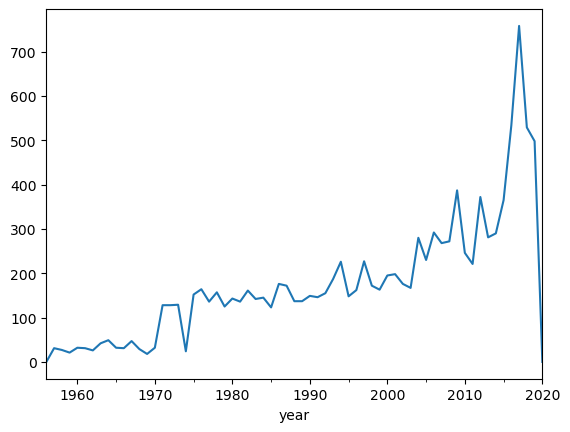

In [126]:
year_max.plot()

## Task 7: Choose your own analysis!
Come up with your own analysis of the Eurovision data that reveals some pattern across the data or through time. Feel free to discuss your ideas with others; often this leads to new ideas or refinement of ones you are already working on.